## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,P/B Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,HVID.CO,Hvidbjerg Bank A/S,Buy,0.6,0.33,0.09,0.18,1.08,-0.84,0.08,...,1.35,96.75,1.26,NaN,0.0,0.19,Financial Services,Banks - Regional,Denmark,True


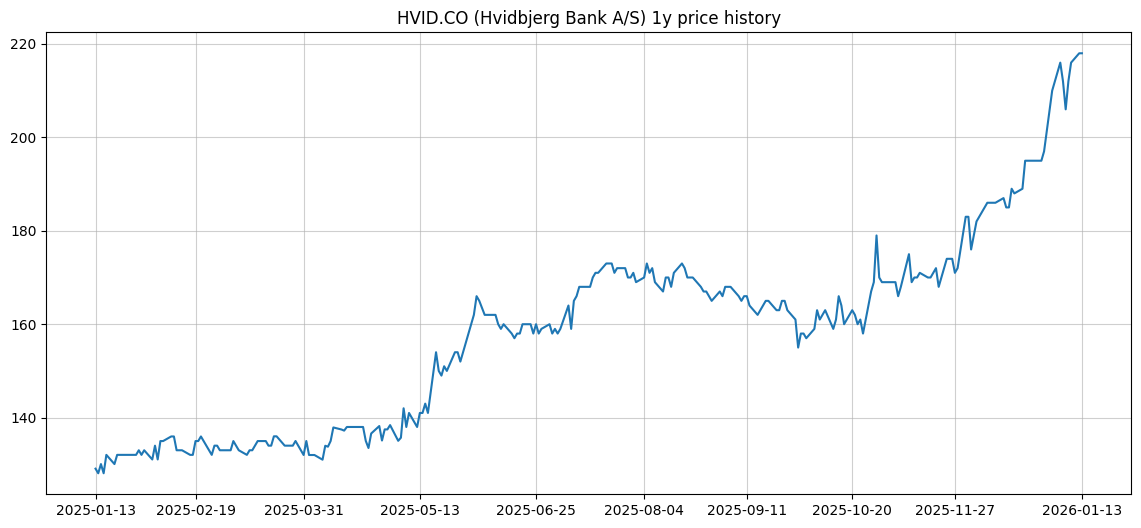

50d Average Change%: 0.19


In [3]:
symbol = "HVID.CO"
stock = Stock(symbol)
display(stock.summary())
stock.price_graph("1y")
print(f"50d Average Change%: {round(stock.momentum, 2)}")

### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Recommendation Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 76/76 [00:53<00:00,  1.41it/s]


,Ticker,Name,Signal,Recommendation Score,Value Score,Quality Score,Momentum Score,P/E Score,ROA Score,P/B Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,Buy,2.51,2.10,0.36,0.05,0.99,0.88,0.09,...,7.78,30.70,1.18,0.01,0.0,0.03,Healthcare,Biotechnology,Denmark,False
0,GUBRA.CO,Gubra A/S,Buy,2.03,1.98,-0.00,0.05,1.04,0.95,-0.15,...,78.15,106.11,6.64,0.08,0.0,0.03,Healthcare,Biotechnology,Denmark,True
0,HLUN-A.CO,H. Lundbeck A/S A,Buy,1.98,1.83,0.02,0.13,0.84,0.90,0.05,...,8.28,3.84,1.53,0.49,0.0,0.10,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
0,ZEAL.CO,Zealand Pharma A/S,Buy,1.98,2.13,0.02,-0.17,1.04,0.95,-0.01,...,33.45,91.30,1.92,0.03,0.0,-0.15,Healthcare,Biotechnology,Denmark,True
0,TRMD,TORM plc,Buy,1.96,1.72,0.16,0.08,0.93,0.61,0.10,...,5.99,2.73,1.02,0.42,0.0,0.06,Energy,Oil & Gas Midstream,United Kingdom,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,BAESY,BAE Systems PLC,Sell,-0.98,-1.33,0.16,0.19,-1.04,-0.02,-0.15,...,4.27,3.49,23.58,0.86,0.0,0.22,Industrials,Aerospace & Defense,United Kingdom,False
0,UBER,"Uber Technologies, Inc.",Sell,-1.06,-0.88,-0.14,-0.05,-1.14,0.35,-0.15,...,5.16,1.94,6.26,0.46,-1.3,-0.03,Technology,Software - Application,United States,False
0,VWS.CO,Vestas Wind Systems A/S,Sell,-1.18,-1.47,0.16,0.13,-0.73,-0.46,-0.15,...,3.19,6.94,6.88,0.96,0.0,0.10,Industrials,Specialty Industrial Machinery,Denmark,False
0,SOLAR-B.CO,Solar B A/S,Sell,-1.59,-1.90,0.22,0.09,-1.15,-0.73,0.11,...,2.15,3.53,0.88,1.09,0.0,0.06,Technology,Electronics & Computer Distribution,Denmark,False
